# IITM - MLP - Week 9

## Imports

In [47]:
# ---------- Common ------------
import os, time, json, random, ast
from datetime import datetime ; from collections import Counter; from pprint import pprint; from statistics import mode

# ---------- Data Manipulation ------------
import pandas as pd; import numpy as np

# ---------- Data Visualization ------------
from pandas.plotting import scatter_matrix
from pandas.core import missing
import matplotlib as mpl; from matplotlib import pyplot as plt; from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns
import plotly.express as px

# ---------- Sklearn ------------
from sklearn import set_config

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, cross_validate, cross_val_predict, validation_curve, learning_curve, ShuffleSplit, GridSearchCV, RandomizedSearchCV, KFold, RepeatedKFold, permutation_test_score
from sklearn.preprocessing import add_dummy_feature, OrdinalEncoder, OneHotEncoder, LabelBinarizer, LabelEncoder, MultiLabelBinarizer, MinMaxScaler, MaxAbsScaler, StandardScaler, FunctionTransformer, PolynomialFeatures, KBinsDiscretizer
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV, SGDRegressor, Ridge, RidgeCV, Lasso, LassoCV, Perceptron, SGDClassifier, RidgeClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, explained_variance_score, max_error, mean_absolute_error, r2_score, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, plot_roc_curve, precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, accuracy_score, classification_report, hinge_loss, make_scorer, log_loss
from sklearn.feature_selection import VarianceThreshold, SelectPercentile, SelectKBest, GenericUnivariateSelect, mutual_info_classif, mutual_info_regression, chi2, f_classif, f_regression, RFE, RFECV, SequentialFeatureSelector, SelectFromModel
from sklearn.datasets import load_iris, fetch_california_housing, make_blobs, make_regression, make_classification, make_multilabel_classification, fetch_openml

from sklearn.tree import export_text, DecisionTreeRegressor, DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.feature_extraction import DictVectorizer

# ---------- Imblearn ------------
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# ---------- Scipy ------------
from scipy import stats
from scipy.stats import pearsonr, spearmanr, kendalltau, loguniform, uniform

# ---------- Extras ------------
import pickle
# pickle.dump(model, open(filename, 'wb'))
# loaded_model = pickle.load(open(filename, 'rb'))

import tempfile

import warnings
warnings.filterwarnings("ignore")  # supress all warning (use with care)

## Presets

In [12]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

plt.style.use('seaborn')
sns.set_theme(style="whitegrid")
# custom_params = {"axes.spines.right": False, "axes.spines.top": False}
# sns.set_theme(style="ticks", rc=custom_params)

# set_config(display='diagram')

np.random.seed(306)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)
# mpl.rc("figure", figsize=(8,6))

# Regression with california housing

## Load data

In [19]:
features, labels = fetch_california_housing(as_frame=True, return_X_y=True)
com_train_features, test_features, com_train_labels, test_labels = train_test_split(features, labels, random_state=42)
train_features, dev_features, train_labels, dev_labels = train_test_split(com_train_features, com_train_labels, random_state=42)

## Model setup

In [14]:
dt_reg_pipeline = Pipeline([('feature_scaling', StandardScaler()),
                            ('dt_reg', DecisionTreeRegressor(max_depth=3, random_state=42))])

dt_reg_cv_results = cross_validate(dt_reg_pipeline, 
                                   com_train_features, 
                                   com_train_labels, 
                                   cv=cv, 
                                   scoring='neg_mean_absolute_error', 
                                   return_train_score=True, 
                                   return_estimator=True)

dt_reg_train_error = -1 * dt_reg_cv_results['train_score']
dt_reg_test_error = -1 * dt_reg_cv_results['test_score']

print(dt_reg_train_error.mean(), dt_reg_train_error.std()) # Mean absolute training error
print(dt_reg_test_error.mean(), dt_reg_test_error.std()) # Mean absolute test error

0.5895995682120934 0.004873994610268372
0.5926692636750868 0.006672158499231682


## Visualizing using Tree diagram

In [15]:
dt_reg_pipeline.fit(train_features, train_labels)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('dt_reg',
                 DecisionTreeRegressor(max_depth=3, random_state=42))])

### Tree diagram

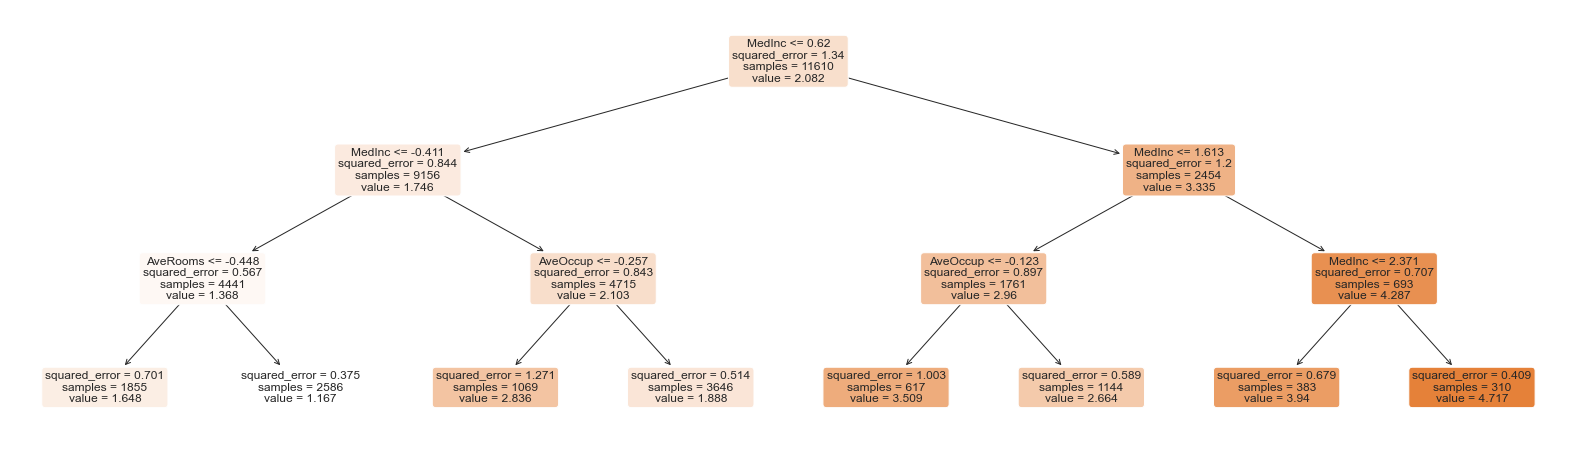

In [16]:
plt.figure(figsize=(28,8), facecolor='w')
a = tree.plot_tree(dt_reg_pipeline[-1], feature_names=features.columns, rounded=True, filled=True, fontsize=12)
plt.show()

### Tree Text

In [17]:
tree_rules = export_text(dt_reg_pipeline[-1])
print(tree_rules )

|--- feature_0 <= 0.62
|   |--- feature_0 <= -0.41
|   |   |--- feature_2 <= -0.45
|   |   |   |--- value: [1.65]
|   |   |--- feature_2 >  -0.45
|   |   |   |--- value: [1.17]
|   |--- feature_0 >  -0.41
|   |   |--- feature_5 <= -0.26
|   |   |   |--- value: [2.84]
|   |   |--- feature_5 >  -0.26
|   |   |   |--- value: [1.89]
|--- feature_0 >  0.62
|   |--- feature_0 <= 1.61
|   |   |--- feature_5 <= -0.12
|   |   |   |--- value: [3.51]
|   |   |--- feature_5 >  -0.12
|   |   |   |--- value: [2.66]
|   |--- feature_0 >  1.61
|   |   |--- feature_0 <= 2.37
|   |   |   |--- value: [3.94]
|   |   |--- feature_0 >  2.37
|   |   |   |--- value: [4.72]



## Predict

In [20]:
test_labels_pred = dt_reg_pipeline.predict(test_features)

In [22]:
print(test_labels_pred[:5])

[1.64779849 1.16717441 2.83555734 2.6643926  1.88772495]


## Evaluate

In [23]:
mae = mean_absolute_error(test_labels, test_labels_pred)
mse = mean_squared_error(test_labels, test_labels_pred)
r2 = r2_score(test_labels, test_labels_pred)

print(f"MAE: {mae}, MSE: {mse}, r2 score: {r2}")

MAE: 0.6005762942842664, MSE: 0.6417557936098145, r2 score: 0.5150037690483743


## HPT

In [24]:
param_grid = {'dt_reg__max_depth': range(1, 15), 'dt_reg__min_samples_split': range(2, 8)}

dt_grid_search = GridSearchCV(dt_reg_pipeline, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='neg_mean_absolute_error', return_train_score=True)
dt_grid_search.fit(com_train_features, com_train_labels)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('feature_scaling', StandardScaler()),
                                       ('dt_reg',
                                        DecisionTreeRegressor(max_depth=3,
                                                              random_state=42))]),
             n_jobs=-1,
             param_grid={'dt_reg__max_depth': range(1, 15),
                         'dt_reg__min_samples_split': range(2, 8)},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [28]:
print(dt_grid_search.best_index_)
print(dt_grid_search.best_score_)
print(dt_grid_search.best_params_)
print(dt_grid_search.best_estimator_)

63
-0.4283313044233501
{'dt_reg__max_depth': 11, 'dt_reg__min_samples_split': 5}
Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('dt_reg',
                 DecisionTreeRegressor(max_depth=11, min_samples_split=5,
                                       random_state=42))])


In [26]:
mean_train_error = -1 * dt_grid_search.cv_results_['mean_train_score'][dt_grid_search.best_index_]
mean_test_error = -1 * dt_grid_search.cv_results_['mean_test_score'][dt_grid_search.best_index_]
std_train_error = -1 * dt_grid_search.cv_results_['std_train_score'][dt_grid_search.best_index_]
std_test_error = -1 * dt_grid_search.cv_results_['std_test_score'][dt_grid_search.best_index_]

print(mean_train_error, std_train_error)
print(mean_test_error, std_test_error)

0.27823056836739307 -0.0064898307245129586
0.4283313044233501 -0.011693730815682686


In [30]:
# # manually define new model with best params
# dt_reg_pipeline.set_params(dt_reg__max_depth=11, dt_reg__min_samples_split=5).fit(com_train_features, com_train_labels) # best param model
# # OR
# # Use best_estimator_
dt_grid_search.best_estimator_.fit(com_train_features, com_train_labels)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('dt_reg',
                 DecisionTreeRegressor(max_depth=11, min_samples_split=5,
                                       random_state=42))])

In [31]:
test_labels_pred = dt_reg_pipeline.predict(test_features)
mae = mean_absolute_error(test_labels, test_labels_pred)
mse = mean_squared_error(test_labels, test_labels_pred)
r2 = r2_score(test_labels, test_labels_pred)

print(f"MAE: {mae}, MSE: {mse}, r2 score: {r2}")

MAE: 0.4248952183820017, MSE: 0.4154957726373763, r2 score: 0.6859960039130073


# Classification with Abalone data

## Load data

In [33]:
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

abalone_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',
                           names=column_names)
print(abalone_data.shape)

(4177, 9)


In [34]:
abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Exploring data

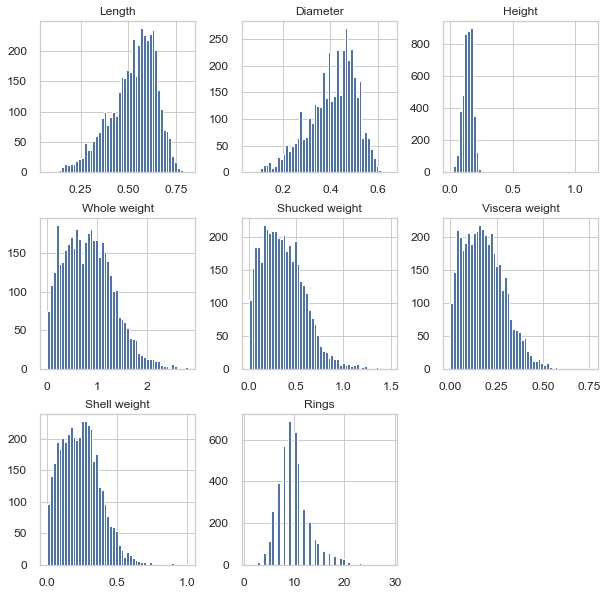

In [35]:
abalone_data.hist(bins=50, figsize=(10, 10))
plt.show()

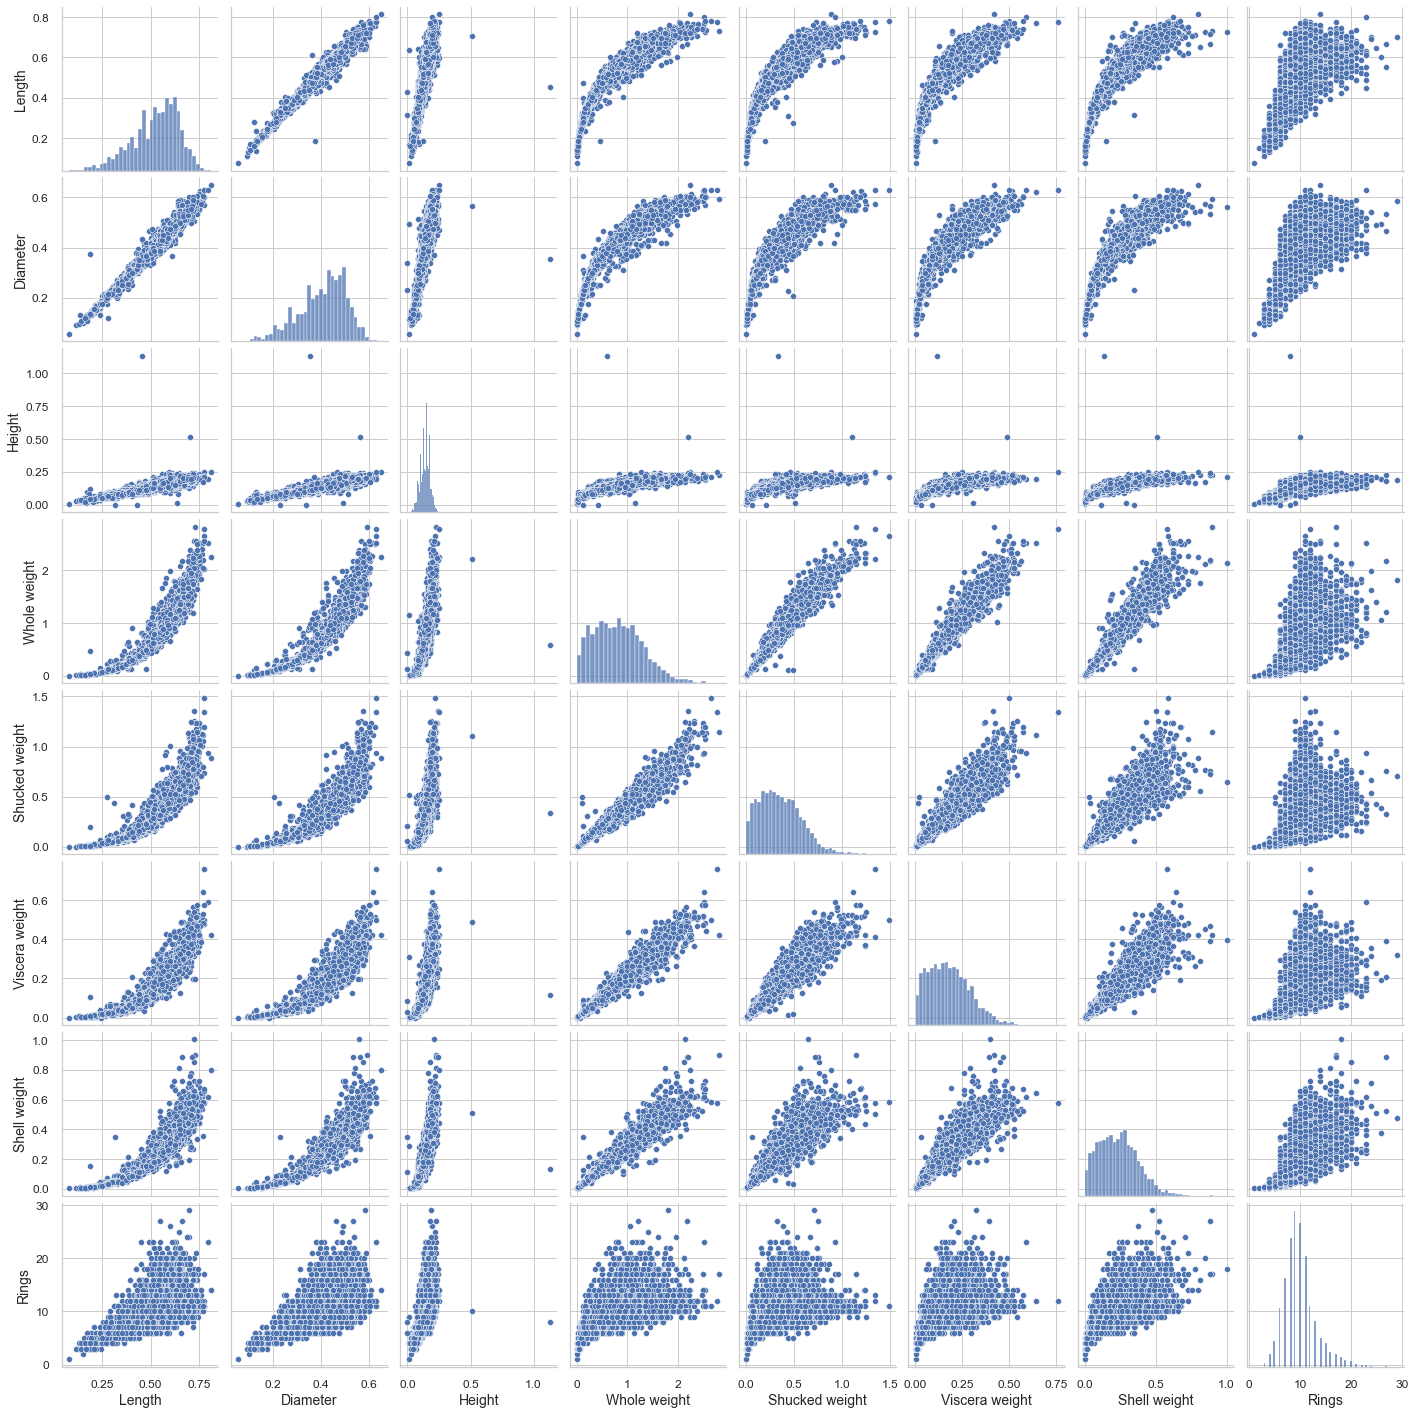

In [36]:
sns.pairplot(abalone_data, diag_kind='hist')
plt.show()

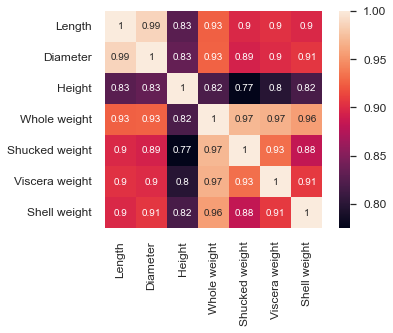

In [37]:
sns.heatmap(abalone_data.iloc[:, :-1].corr(), annot=True, square=True)
plt.show()

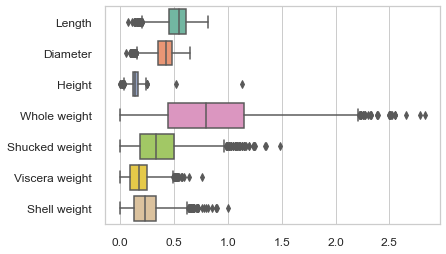

In [38]:
sns.boxplot(data=abalone_data.iloc[:, :-1], orient='h', palette='Set2')
plt.show()

In [39]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [40]:
abalone_data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [42]:
abalone_data['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [41]:
abalone_data['Rings'].value_counts().sort_index().to_frame().T

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29
Rings,1,1,15,57,115,259,391,568,689,634,487,267,203,126,103,67,58,42,32,26,14,6,9,2,1,1,2,1


## Missing values

In [43]:
abalone_data[abalone_data['Height'] == 0] # two rows with height=0

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [44]:
(abalone_data['Height'] == 0).sum()

2

In [45]:
means = pd.pivot_table(abalone_data, index=['Sex'], aggfunc={'Height': np.mean})
means

,Height
Sex,
F,0.158011
I,0.107996
M,0.151381


### We'll use the mean infant height of 0.107 from above table to fill in for missing values

## Model setup

In [49]:
X = abalone_data.iloc[:, :-1]
y = abalone_data.iloc[:, -1]

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

(4177, 8) (4177,)


In [50]:
numeric_features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
categorical_features = ['Sex']

numeric_transformer = Pipeline([('imputer', SimpleImputer(missing_values=0, strategy='constant', fill_value=0.107996)),
                                ('scaler', StandardScaler())])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer([('num', numeric_transformer, numeric_features), 
                                  ('cat', categorical_transformer, categorical_features)])

clf = Pipeline([('preprocessor', preprocessor),
                ('classifier', DecisionTreeClassifier(max_depth=3, random_state=42))])

clf.fit(X_train, y_train)

print(f"Model score: {clf.score(X_test, y_test)}")

y_pred = clf.predict(X_test)

Model score: 0.2452153110047847


### Model Performance

In [53]:
comparison = np.concatenate((y_pred.reshape(len(y_pred), 1), np.array(y_test).reshape(len(y_test), 1)), axis=1)
print(y_pred.shape, comparison.shape)

for each in comparison[:10, :]: print(each)

(836,) (836, 2)
[10 13]
[8 8]
[10 11]
[4 5]
[10 12]
[10 11]
[9 7]
[8 8]
[7 7]
[10  9]


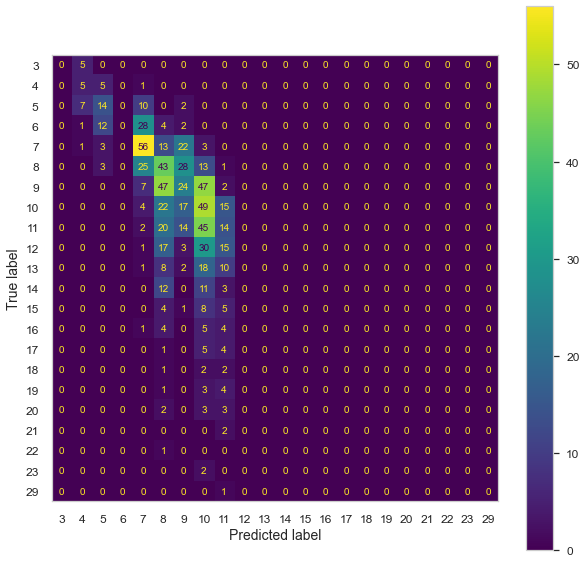

In [69]:
fig, ax = plt.subplots(figsize=(10,10))
plt.grid(False)
cmp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='0.5g', ax=ax)

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.26      0.45      0.33        11
           5       0.38      0.42      0.40        33
           6       0.00      0.00      0.00        47
           7       0.41      0.57      0.48        98
           8       0.21      0.38      0.27       113
           9       0.21      0.19      0.20       127
          10       0.20      0.46      0.28       107
          11       0.16      0.15      0.16        95
          12       0.00      0.00      0.00        66
          13       0.00      0.00      0.00        39
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00        18
          16       0.00      0.00      0.00        14
          17       0.00      0.00      0.00        10
          18       0.00      0.00      0.00         5
          19       0.00      0.00      0.00         8
          20       0.00    

### Cross Validation

In [71]:
acc = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10)
print(f"Accuracy of each fold: {acc * 100}")
print(f'Accuracy: {acc.mean()}')

Accuracy of each fold: [27.46268657 22.45508982 23.95209581 24.5508982  24.25149701 23.95209581
 25.4491018  30.83832335 26.34730539 26.04790419]
Accuracy: 0.25530699794440964


### Visualizing Tree

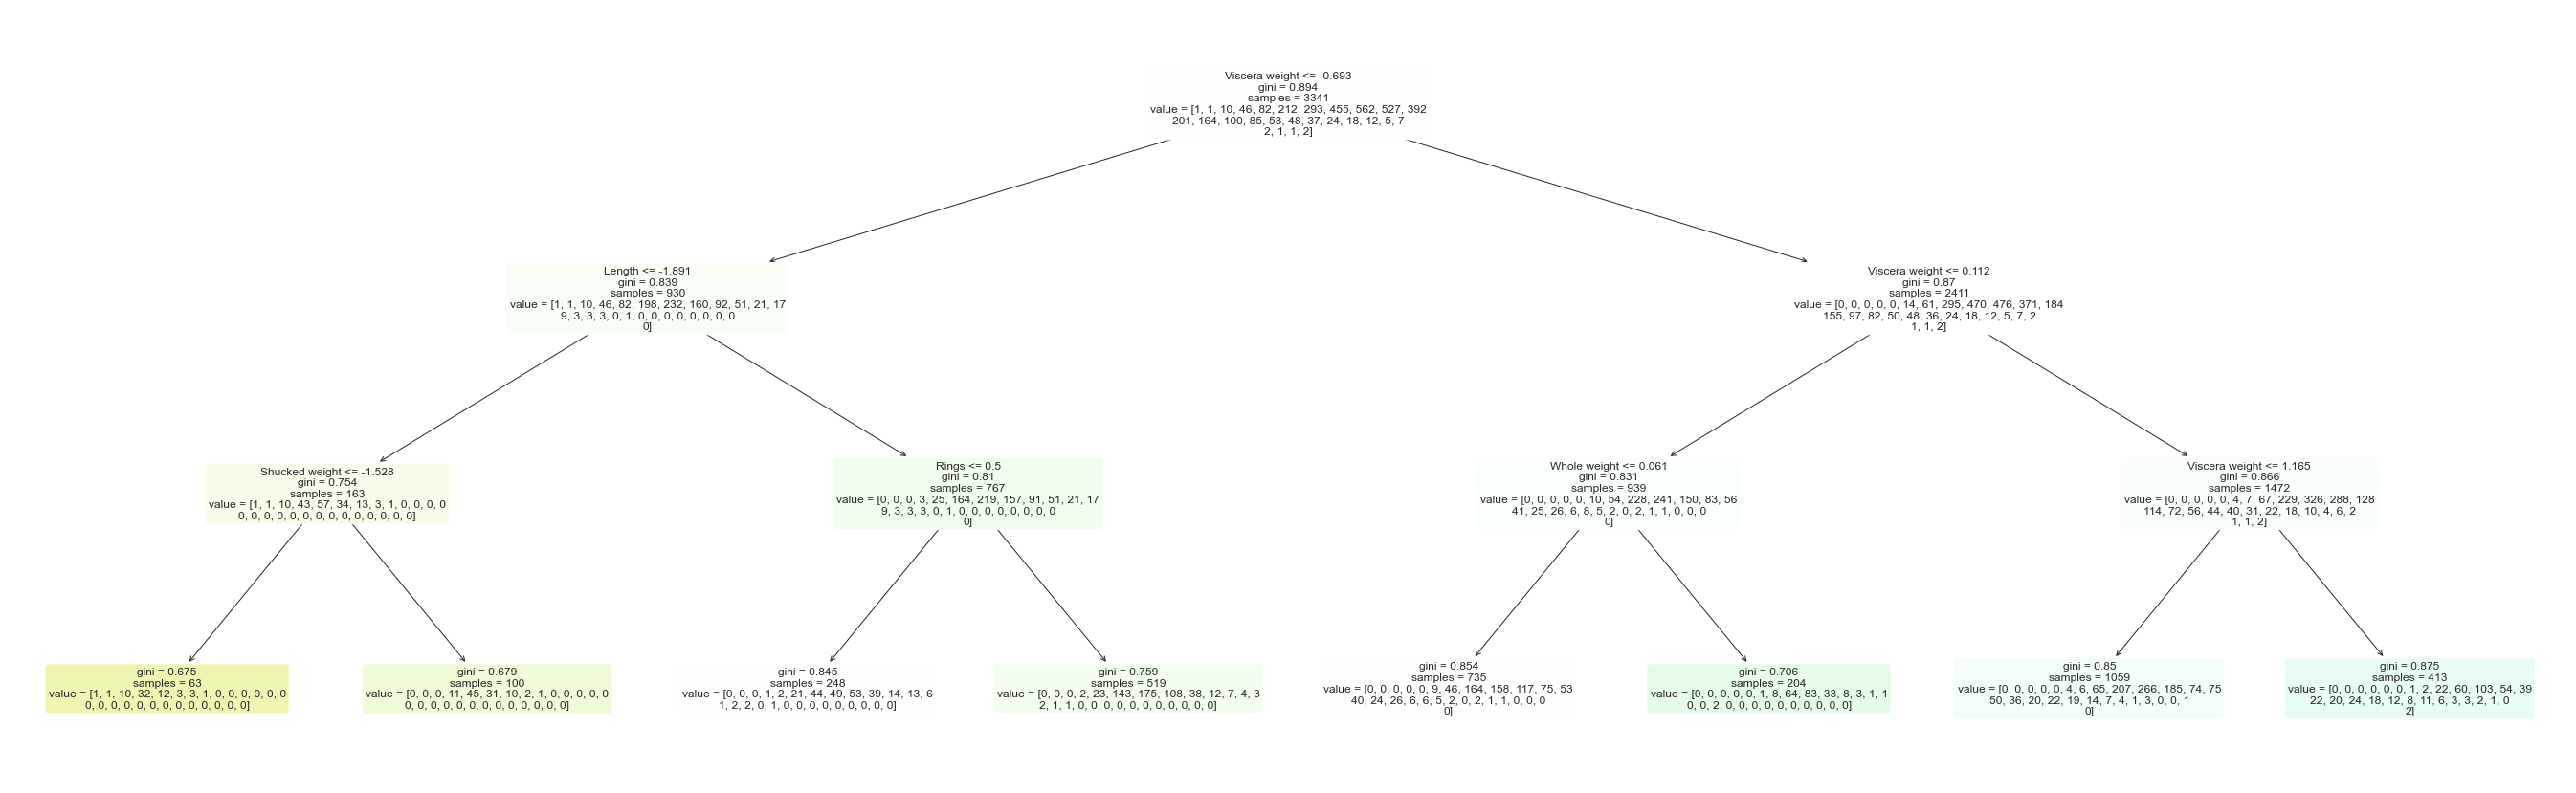

In [73]:
plt.figure(figsize=(48, 15), facecolor='w')
a = tree.plot_tree(clf[-1], feature_names=column_names, rounded=True, filled=True, fontsize=12)  # save image and then zoom
plt.show()

## HPT

In [74]:
y_train.unique()

array([ 5,  3, 15, 10, 14, 11,  7, 19,  9, 12,  8, 13, 18, 16,  4,  6, 17,
       24, 22, 20,  2, 21, 23, 25, 27, 26,  1], dtype=int64)

In [76]:
X_train_new = preprocessor.fit_transform(X_train)

tuned_parameters = {'max_depth': [1,3,5,7], 'min_samples_split': [2,4,6]}
clf_cv = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='recall_macro')
clf_cv.fit(X_train_new, y_train)

# Alternatively...
# tuned_parameters = {'classifier__max_depth': [1,2,3,4,5,6,7,8,9], 'classifier__min_samples_split': [2,4,5,8,10]}
# clf_cv = GridSearchCV(clf, tuned_parameters)
# clf_cv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7],
                         'min_samples_split': [2, 4, 6]},
             scoring='recall_macro')

In [77]:
print(clf_cv.best_params_)
means = clf_cv.cv_results_['mean_test_score']
stds = clf_cv.cv_results_['std_test_score']
params = clf_cv.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print(f'{mean} +-{std} for {param}')

{'max_depth': 5, 'min_samples_split': 2}
0.07344207874521547 +-0.004435943588474353 for {'max_depth': 1, 'min_samples_split': 2}
0.07344207874521547 +-0.004435943588474353 for {'max_depth': 1, 'min_samples_split': 4}
0.07344207874521547 +-0.004435943588474353 for {'max_depth': 1, 'min_samples_split': 6}
0.13136264544436022 +-0.0060588931656081375 for {'max_depth': 3, 'min_samples_split': 2}
0.13136264544436022 +-0.0060588931656081375 for {'max_depth': 3, 'min_samples_split': 4}
0.13136264544436022 +-0.0060588931656081375 for {'max_depth': 3, 'min_samples_split': 6}
0.14445017246915334 +-0.009083506034041825 for {'max_depth': 5, 'min_samples_split': 2}
0.14445017246915334 +-0.009083506034041825 for {'max_depth': 5, 'min_samples_split': 4}
0.14445017246915334 +-0.009083506034041825 for {'max_depth': 5, 'min_samples_split': 6}
0.1364977891754418 +-0.016918509435139492 for {'max_depth': 7, 'min_samples_split': 2}
0.13707963369695558 +-0.016634876936290326 for {'max_depth': 7, 'min_samples_

In [78]:
# for constant max_depth, any min samples split is giving same result

### With the best parameters

In [79]:
clf2 = Pipeline([('preprocessor', preprocessor),
                 ('classifier', DecisionTreeClassifier(max_depth=5, min_samples_split=2, random_state=42))])
clf2.fit(X_train, y_train)
print(clf2.score(X_test, y_test))

0.2715311004784689


There's a marginal improvement in the score, due to GridSearchCV

# Classification with Iris data

## Load data

In [80]:
X, y = load_iris(return_X_y=True, as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model

In [81]:
dt_pipeline = Pipeline([('feature_scaling', MinMaxScaler()),
                        ('dt_classifier', DecisionTreeClassifier(max_depth=3, random_state=42))])

dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('feature_scaling', MinMaxScaler()),
                ('dt_classifier',
                 DecisionTreeClassifier(max_depth=3, random_state=42))])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



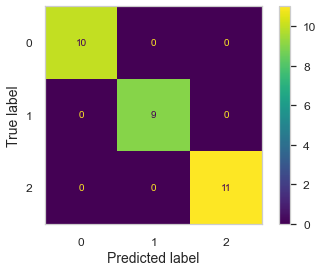

In [84]:
print(classification_report(y_test, dt_pipeline.predict(X_test)))

ConfusionMatrixDisplay.from_estimator(dt_pipeline, X_test, y_test)
plt.grid(False)

## Visualize Tree

In [88]:
data = load_iris() # to visualize decision tree we need class names which are not available in dataframe so load it this way and plot tree

print(type(data))
print(data.keys())
print(data.feature_names)
print(data.target_names)

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


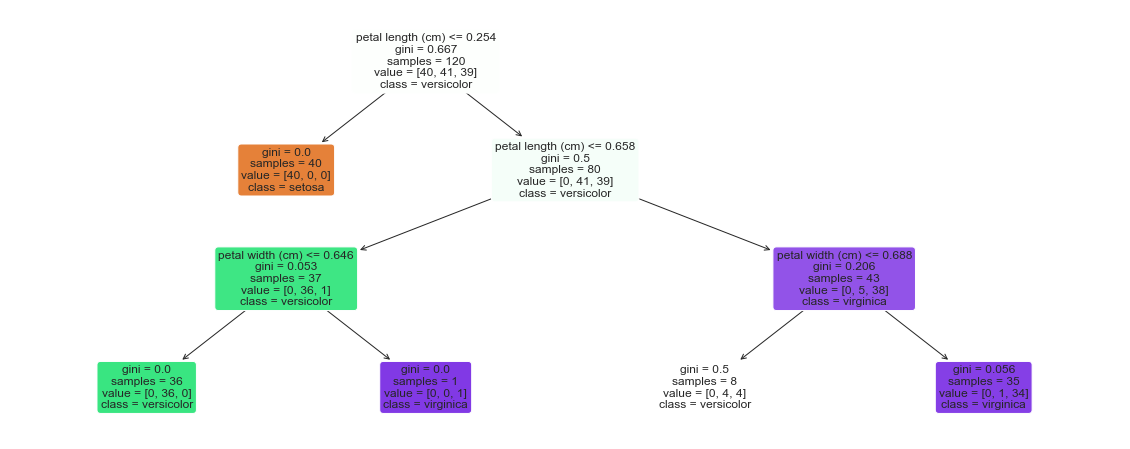

In [91]:
plt.figure(figsize=(20, 8), facecolor='w')
a = tree.plot_tree(dt_pipeline[-1], 
                   feature_names=data.feature_names, 
                   class_names=data.target_names, 
                   rounded=True, 
                   filled=True, 
                   fontsize=12)
plt.show()

In [92]:
tree_rules = export_text(dt_pipeline[-1], feature_names=data.feature_names)
print(tree_rules)

|--- petal length (cm) <= 0.25
|   |--- class: 0
|--- petal length (cm) >  0.25
|   |--- petal length (cm) <= 0.66
|   |   |--- petal width (cm) <= 0.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  0.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  0.66
|   |   |--- petal width (cm) <= 0.69
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  0.69
|   |   |   |--- class: 2



## Feature importances

In [93]:
dt_pipeline

Pipeline(steps=[('feature_scaling', MinMaxScaler()),
                ('dt_classifier',
                 DecisionTreeClassifier(max_depth=3, random_state=42))])

In [94]:
dt_pipeline[-1]

DecisionTreeClassifier(max_depth=3, random_state=42)

In [95]:
dt_pipeline[-1].feature_importances_

array([0.        , 0.        , 0.93462632, 0.06537368])

In [96]:
importance = pd.DataFrame({'feature': data.feature_names,
                           'importance': np.round(dt_pipeline[-1].feature_importances_, 3)})
importance.sort_values('importance', ascending=False, inplace=True)
print(importance)

             feature  importance
2  petal length (cm)       0.935
3   petal width (cm)       0.065
0  sepal length (cm)       0.000
1   sepal width (cm)       0.000


## HPT

In [97]:
tuned_parameters = {'dt_classifier__max_depth': [2,3,4,5], 'dt_classifier__min_samples_split': [2,4,6,8]}
clf_cv = GridSearchCV(dt_pipeline, tuned_parameters, scoring='f1_macro')
clf_cv.fit(X_train, y_train)

print(clf_cv.best_params_)

means = clf_cv.cv_results_['mean_test_score']
stds = clf_cv.cv_results_['std_test_score']
params = clf_cv.cv_results_['params']

for mean, std, param in zip(means, stds, params):
    print(f'{mean} +-{std} for {param}')

{'dt_classifier__max_depth': 4, 'dt_classifier__min_samples_split': 2}
0.916065792938858 +-0.045340507280153944 for {'dt_classifier__max_depth': 2, 'dt_classifier__min_samples_split': 2}
0.916065792938858 +-0.045340507280153944 for {'dt_classifier__max_depth': 2, 'dt_classifier__min_samples_split': 4}
0.916065792938858 +-0.045340507280153944 for {'dt_classifier__max_depth': 2, 'dt_classifier__min_samples_split': 6}
0.916065792938858 +-0.045340507280153944 for {'dt_classifier__max_depth': 2, 'dt_classifier__min_samples_split': 8}
0.9324679093409743 +-0.057311128872574564 for {'dt_classifier__max_depth': 3, 'dt_classifier__min_samples_split': 2}
0.9324679093409743 +-0.057311128872574564 for {'dt_classifier__max_depth': 3, 'dt_classifier__min_samples_split': 4}
0.9324679093409743 +-0.057311128872574564 for {'dt_classifier__max_depth': 3, 'dt_classifier__min_samples_split': 6}
0.9324679093409743 +-0.057311128872574564 for {'dt_classifier__max_depth': 3, 'dt_classifier__min_samples_split': 

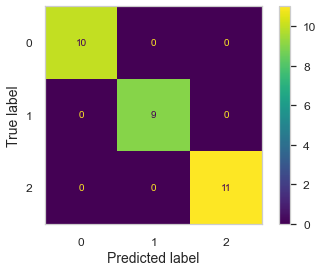

In [98]:
ConfusionMatrixDisplay.from_estimator(clf_cv.best_estimator_, X_test, y_test)
plt.grid(False)

# Assignment Graded

### 1-3

In [13]:
from sklearn.datasets import load_wine

In [14]:
X, y = load_wine(return_X_y=True)

In [15]:
X.shape, y.shape

((178, 13), (178,))

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [18]:
criterion = ['entropy', 'gini']
splitter = ['random', 'best']
min_samples_leaf = [2,4,6,8,10]
max_depth = [3,4,5,6]

param_grid={'criterion': criterion, 'splitter': splitter, 'min_samples_leaf': min_samples_leaf, 'max_depth': max_depth}

dt_classifier = DecisionTreeClassifier(random_state=1)
clf = GridSearchCV(dt_classifier, param_grid=param_grid, cv=4, return_train_score=True)
clf.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'splitter': ['random', 'best']},
             return_train_score=True)

In [19]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, random_state=1)

In [20]:
clf.cv_results_['mean_test_score'].mean()

0.84375

In [21]:
clf_best = clf.best_estimator_
clf_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, random_state=1)

In [22]:
print(clf_best.score(X_test, y_test))

0.9074074074074074


## 4-7

In [23]:
from sklearn.datasets import load_diabetes

In [24]:
X, y = load_diabetes(return_X_y=True)

In [25]:
X.shape, y.shape

((442, 10), (442,))

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [27]:
from sklearn.tree import DecisionTreeRegressor

In [28]:
dt_classifier = DecisionTreeRegressor(criterion='squared_error', splitter='random', max_leaf_nodes=10, random_state=1)
dt_classifier.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=10, random_state=1, splitter='random')

In [29]:
dt_classifier.score(X_train, y_train)

0.5032060624566737

In [30]:
dt_classifier.score(X_test, y_test)

0.218771375137222

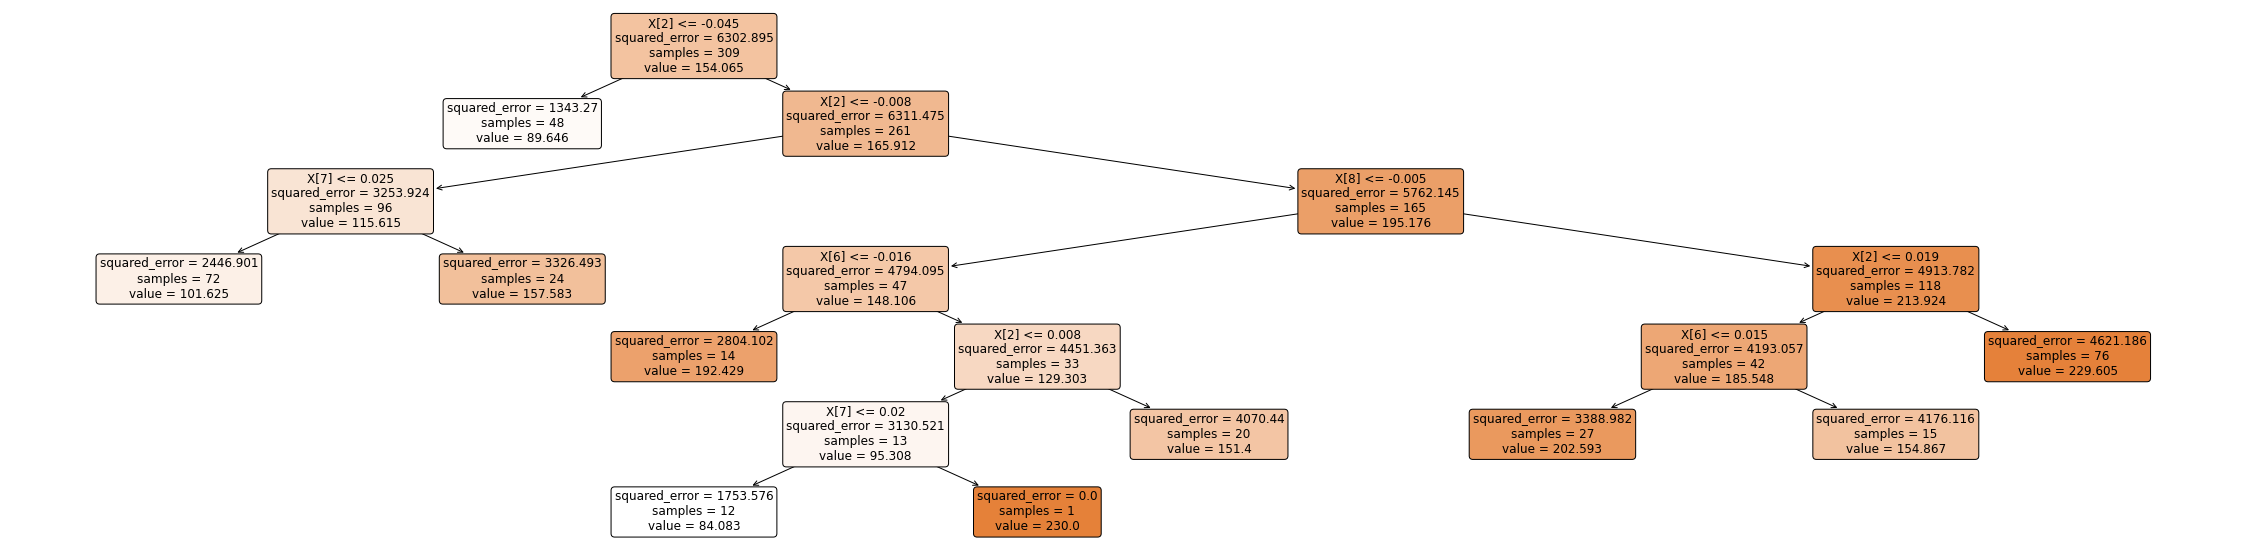

In [31]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 10))
t = plot_tree(dt_classifier, filled=True, rounded=True, fontsize=12)
plt.show()

In [32]:
ratio = 48/261
print(ratio)

0.1839080459770115


## 8-9

In [33]:
from sklearn.datasets import load_diabetes

In [34]:
X, y = load_diabetes(return_X_y=True)

In [35]:
X.shape, y.shape

((442, 10), (442,))

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
criterion = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
splitter = ['random', 'best']
max_features = ['auto','sqrt', 'log2']
ccp_alpha = [0.001,0.01,0.02,0.05]

param_grid = {'criterion': criterion, 'splitter': splitter, 'max_features': max_features, 'ccp_alpha': ccp_alpha}

dt_regressor = DecisionTreeRegressor(max_depth=4, random_state=1)
clf = GridSearchCV(dt_regressor, param_grid=param_grid, cv=4, return_train_score=True)
clf.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(max_depth=4, random_state=1),
             param_grid={'ccp_alpha': [0.001, 0.01, 0.02, 0.05],
                         'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['random', 'best']},
             return_train_score=True)

In [39]:
clf.cv_results_['mean_test_score'].mean()

0.23992468734287717

In [40]:
clf_best = clf.best_estimator_
clf_best.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.02, criterion='absolute_error', max_depth=4,
                      max_features='auto', random_state=1)

In [41]:
clf_best.score(X_test, y_test)

0.10873445074064803

In [42]:
clf.best_params_

{'ccp_alpha': 0.02,
 'criterion': 'absolute_error',
 'max_features': 'auto',
 'splitter': 'best'}

# END